In [1]:
import os
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt


## Dynamically reads in all CSV files within folder and combines them into one DF

In [2]:



# get data file names
path =r'Resources'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)



In [3]:
big_frame.head(25)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1
5,861,2013-07-01 00:01:23,2013-07-01 00:15:44,511,E 14 St & Avenue B,40.729387,-73.977724,454,E 51 St & 1 Ave,40.754557,-73.965930,16223,Subscriber,1988,1
6,550,2013-07-01 00:01:59,2013-07-01 00:11:09,293,Lafayette St & E 8 St,40.730287,-73.990765,394,E 9 St & Avenue C,40.725213,-73.977688,16746,Customer,\N,0
7,288,2013-07-01 00:02:16,2013-07-01 00:07:04,224,Spruce St & Nassau St,40.711464,-74.005524,376,John St & William St,40.708621,-74.007222,16062,Subscriber,1985,2
8,766,2013-07-01 00:02:16,2013-07-01 00:15:02,432,E 7 St & Avenue A,40.726218,-73.983799,336,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2
9,773,2013-07-01 00:02:23,2013-07-01 00:15:16,173,Broadway & W 49 St,40.760647,-73.984427,479,9 Ave & W 45 St,40.760193,-73.991255,19365,Subscriber,1989,1


In [4]:

#Export DataFrame to csv output file

output_file = os.path.join("data", "DataFrame.csv")
big_frame.to_csv(output_file, index=False, header=True)


In [5]:

# Run Code from here if only transforming

big_frame.count()

tripduration               5562321
starttime                  5562321
stoptime                   5562321
start station id           5562321
start station name         5562321
start station latitude     5562321
start station longitude    5562321
end station id             5562321
end station name           5562321
end station latitude       5562321
end station longitude      5562321
bikeid                     5562321
usertype                   5562321
birth year                 5562321
gender                     5562321
dtype: int64

In [6]:
# Copy DF for integrity
transform_df= big_frame.copy()

In [7]:

# Convert datetimes from string to timestamp
transform_df['starttime'] = pd.to_datetime(transform_df.starttime)
transform_df['stoptime'] = pd.to_datetime(transform_df.stoptime)

# Separate into seperate columns
new_date, new_time = zip(*[(d.date(), d.time()) for d in transform_df['starttime']])
transform_df = transform_df.assign(start_date=new_date, start_time=new_time)

new_date, new_time = zip(*[(d.date(), d.time()) for d in transform_df['stoptime']])
transform_df = transform_df.assign(stop_date=new_date, stop_time=new_time)

transform_df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_date,start_time,stop_date,stop_time
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0,2013-07-01,00:00:00,2013-07-01,00:10:34
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0,2013-07-01,00:00:02,2013-07-01,00:25:49
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2,2013-07-01,00:01:04,2013-07-01,00:04:02
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0,2013-07-01,00:01:06,2013-07-01,00:27:26
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1,2013-07-01,00:01:10,2013-07-01,00:13:47


In [8]:
# Data Overview
transform_df.nunique()

tripduration                 18528
starttime                  4360526
stoptime                   4374840
start station id               330
start station name             330
start station latitude         330
start station longitude        330
end station id                 330
end station name               330
end station latitude           330
end station longitude          330
bikeid                        6689
usertype                         2
birth year                      84
gender                           3
start_date                     243
start_time                   86021
stop_date                      245
stop_time                    86086
dtype: int64

In [9]:
transform_df.loc[transform_df['usertype'] == 'Customer', ['birth year','gender']] = 'Unknown'
transform_df.loc[transform_df['gender'] == '1','gender'] = 'Male'
transform_df.loc[transform_df['gender'] == '2','gender'] = 'Female'
transform_df.loc[transform_df['gender'] == '0','gender'] = 'Unknown'

transform_df['gender'].nunique()

4

In [10]:
#Export DataFrame to csv output file

output_file = os.path.join("data", "Transformed DataFrame.csv")
transform_df.to_csv(output_file, index=False, header=True)

In [11]:
transform_df.head(25)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_date,start_time,stop_date,stop_time
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,Unknown,Unknown,2013-07-01,00:00:00,2013-07-01,00:10:34
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,Unknown,Unknown,2013-07-01,00:00:02,2013-07-01,00:25:49
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2,2013-07-01,00:01:04,2013-07-01,00:04:02
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,Unknown,Unknown,2013-07-01,00:01:06,2013-07-01,00:27:26
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1,2013-07-01,00:01:10,2013-07-01,00:13:47
5,861,2013-07-01 00:01:23,2013-07-01 00:15:44,511,E 14 St & Avenue B,40.729387,-73.977724,454,E 51 St & 1 Ave,40.754557,-73.965930,16223,Subscriber,1988,1,2013-07-01,00:01:23,2013-07-01,00:15:44
6,550,2013-07-01 00:01:59,2013-07-01 00:11:09,293,Lafayette St & E 8 St,40.730287,-73.990765,394,E 9 St & Avenue C,40.725213,-73.977688,16746,Customer,Unknown,Unknown,2013-07-01,00:01:59,2013-07-01,00:11:09
7,288,2013-07-01 00:02:16,2013-07-01 00:07:04,224,Spruce St & Nassau St,40.711464,-74.005524,376,John St & William St,40.708621,-74.007222,16062,Subscriber,1985,2,2013-07-01,00:02:16,2013-07-01,00:07:04
8,766,2013-07-01 00:02:16,2013-07-01 00:15:02,432,E 7 St & Avenue A,40.726218,-73.983799,336,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2,2013-07-01,00:02:16,2013-07-01,00:15:02
9,773,2013-07-01 00:02:23,2013-07-01 00:15:16,173,Broadway & W 49 St,40.760647,-73.984427,479,9 Ave & W 45 St,40.760193,-73.991255,19365,Subscriber,1989,1,2013-07-01,00:02:23,2013-07-01,00:15:16


In [12]:
transform_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid
count,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06
mean,8.788093e+02,4.392877e+02,4.073437e+01,-7.399097e+01,4.396748e+02,4.073407e+01,-7.399108e+01,1.768372e+04
std,3.996941e+03,3.418616e+02,1.985896e-02,1.237111e-02,3.467746e+02,1.987919e-02,1.246343e-02,1.761231e+03
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04
25%,3.980000e+02,3.040000e+02,4.072066e+01,-7.400004e+01,3.030000e+02,4.072043e+01,-7.400026e+01,1.616700e+04
50%,6.340000e+02,4.030000e+02,4.073625e+01,-7.399076e+01,4.020000e+02,4.073544e+01,-7.399076e+01,1.768200e+04
75%,1.042000e+03,4.860000e+02,4.075020e+01,-7.398195e+01,4.840000e+02,4.074972e+01,-7.398195e+01,1.917700e+04
max,6.250750e+06,3.002000e+03,4.077051e+01,-7.395005e+01,3.002000e+03,4.077051e+01,-7.395005e+01,2.154200e+04


In [13]:
min = transform_df['stop_date'].min()

max = transform_df['stop_date'].max()

min, max

(datetime.date(2013, 7, 1), datetime.date(2014, 3, 2))

In [14]:
transform_df.isnull().any()


tripduration               False
starttime                  False
stoptime                   False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
start_date                 False
start_time                 False
stop_date                  False
stop_time                  False
dtype: bool

<AxesSubplot:>

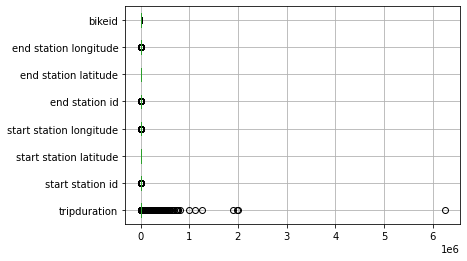

In [15]:
transform_df.boxplot(vert=False)

C:\Users\joshu\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


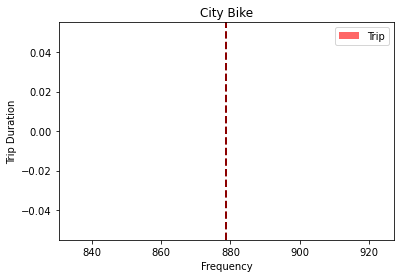

In [16]:
#TX and NY Totals Data
trip=transform_df['tripduration']

#ny=check_data_df['NY_tot']

#Visualization and test distribution of Total Covid Tests in March-September
plt.hist(trip, density=True, color='red', alpha=0.6, label="Trip",range=[0,1])
#plt.hist(ny, density=True, color='green', alpha=0.6, label="NY")
plt.axvline(trip.mean(), color='darkred', linestyle='dashed', linewidth=2)
#plt.axvline(ny.mean(), color='darkgreen', linestyle='dashed', linewidth=2)
plt.ylabel("Trip Duration")
plt.xlabel("Frequency")
plt.title("City Bike")
plt.legend()

array([[<AxesSubplot:title={'center':'tripduration'}>,
        <AxesSubplot:title={'center':'start station id'}>,
        <AxesSubplot:title={'center':'start station latitude'}>],
       [<AxesSubplot:title={'center':'start station longitude'}>,
        <AxesSubplot:title={'center':'end station id'}>,
        <AxesSubplot:title={'center':'end station latitude'}>],
       [<AxesSubplot:title={'center':'end station longitude'}>,
        <AxesSubplot:title={'center':'bikeid'}>, <AxesSubplot:>]],
      dtype=object)

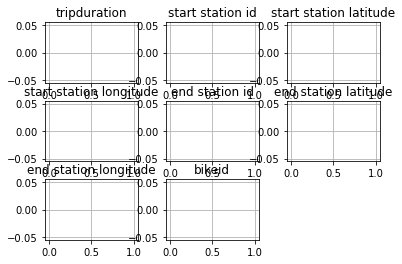

In [17]:
transform_df.hist(range=[0, 1])

In [18]:
transform_df['bikeid'].nunique()

6689